In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import lightgbm as lgb

In [11]:
data = pd.read_csv('datasets/final_elem+hard-feat_data.csv')

X = data.iloc[:,1:-1]
Y = data.iloc[:,-1]

In [14]:
def read_param():  ## function for reading saved hyperparameters
    f0 = open('datasets/best-paramters_lgb_optuna_TPE_plot.txt','r')
    b = []
    for line in f0.readlines():
        a = line.split()
        a_ = [a[i] for i in range(len(a))]
        b.append(a_)
    f0.close()
    p1 = float(b[1][1]); p2 = float(b[2][1]); p3 = int(b[3][1]); p4 = float(b[4][1])
    p5 = float(b[5][1]); p6 = int(b[6][1]); p7 = int(b[7][1]); p8 = float(b[8][1])
#     p9 = int(b[9][1])
    return p1, p2, p3, p4, p5, p6, p7, p8

In [15]:
R2test = []
R2train = []
rmsetest = []
rmsetrain = []

p1, p2, p3, p4, p5, p6, p7, p8 = read_param()
params = {'objective': 'regression', 'boosting_type': 'gbdt', 'lambda_l1': p1,
          'lambda_l2': p2, 'num_leaves': p3, 'feature_fraction': p4, 
          'bagging_fraction': p5, 'bagging_freq': p6, 'min_child_samples': p7,
          'learning_rate': p8} 

## Finding the best ML model

In [16]:
start = 0
end = 1000
test_size = 0.1
for random in range(start, end+1, 1):
    print(random)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                      test_size = test_size, random_state = random)
    d_train = lgb.Dataset(X_train, label = Y_train)                  
    reg = lgb.train(params, d_train)
    
    Y_pred_test = reg.predict(X_test) 
    Y_pred_train = reg.predict(X_train) 
    
    R2_test = r2_score(Y_test, Y_pred_test)
    R2_train = r2_score(Y_train, Y_pred_train)
    print("R2 value train:  ", R2_train)
    print("R2 value test:  ", R2_test)
       
    rmse_test=np.sqrt(mean_squared_error(Y_test, Y_pred_test))
    rmse_train=np.sqrt(mean_squared_error(Y_train, Y_pred_train))
    print("RMSE train:  ", rmse_train)
    print("RMSE test:  ",  rmse_test)
    
    R2test.append(R2_test)
    R2train.append(R2_train)
    rmsetest.append(rmse_test)
    rmsetrain.append(rmse_train)

0
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1765
[LightGBM] [Info] Number of data points in the train set: 2789, number of used features: 11
[LightGBM] [Info] Start training from score -0.580361
R2 value train:   0.9858980451525317
R2 value test:   0.9589226491142043
RMSE train:   0.09475194485409016
RMSE test:   0.17025117580640567
1
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1757
[LightGBM] [Info] Number of data points in the train set: 2789, number of used features: 11
[LightGBM] [Info] Start training from score -0.583437
R2 val

In [17]:
minrmsetest = min(rmsetest)  
ind = rmsetest.index(minrmsetest)  
avg_rmse_train = np.mean(rmsetrain)
avg_rmse_test = np.mean(rmsetest)
avg_r2_train = np.mean(R2train)
avg_r2_test = np.mean(R2test)
print("Random state is = ", start+ind)
print("Best R2 train/test =  ", R2train[ind]," / ", R2test[ind])
print("Best RMSE train/test = ", rmsetrain[ind]," / ",rmsetest[ind])
print("Avg R2 train/test =  ", avg_r2_train," / ", avg_r2_test)
print("Avg RMSE train/test = ", avg_rmse_train," / ",avg_rmse_test)

Random state is =  595
Best R2 train/test =   0.9857997183669637  /  0.9738385364136485
Best RMSE train/test =  0.09588191653257558  /  0.12614712537972475
Avg R2 train/test =   0.9861347837643671  /  0.9588003921616838
Avg RMSE train/test =  0.09444907435854619  /  0.16125457816755512


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1767
[LightGBM] [Info] Number of data points in the train set: 2789, number of used features: 11
[LightGBM] [Info] Start training from score -0.583265
0.09588191653257558 0.12614712537972475


In [24]:
###### =============================================================================
######         Writing to a file
###### =============================================================================
f = open('save-result.txt', 'a')
f.write("No of data points = %d\n" %(len(data)))
f.write("features used = %s\n" %(X.columns))
f.write("No of features = %d\n" %(len(X.columns)))
f.write("Best random state = %d\n" %(ind))
f.write("Model used = %s\n" %(reg.params))
f.write("test size in ratio = %f\n" %(test_size))
f.write("Random state is = %d\n" %(start+ind))
f.write("Best R2 train/test =  %f / %f\n" %(R2train[ind], R2test[ind]))
f.write("Best RMSE train/test = %f / %f\n" %(rmsetrain[ind], rmsetest[ind]))
f.write("Avg R2 train/test =  %f / %f\n" %(avg_r2_train, avg_r2_test))
f.write("Avg RMSE train/test = %f / %f\n" %(avg_rmse_train, avg_rmse_test))
f.write("\n")
f.close()

In [26]:
## Redo the above step for the best model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = ind)
d_train = lgb.Dataset(X_train, label = Y_train)
reg = lgb.train(params, d_train)
Y_pred_test = reg.predict(X_test) 
Y_pred_train = reg.predict(X_train) 

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1767
[LightGBM] [Info] Number of data points in the train set: 2789, number of used features: 11
[LightGBM] [Info] Start training from score -0.583265


## Parity plot

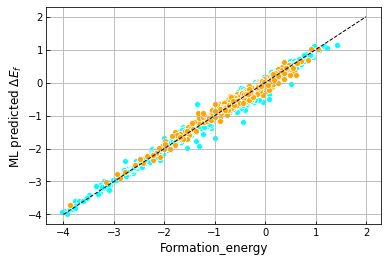

In [27]:
xl = np.arange(-4,3,1)
yl = np.arange(-4,3,1)
plt.plot(yl, xl, linestyle='dashed', linewidth=1.0, color='black')  
##         plotting legend 
# plt.legend(loc = 'upper left') 
plt.tick_params(axis='both', direction='in')
plt.xlabel('DFT (SCAN) $\Delta E_f$',fontsize=12)
plt.ylabel('ML predicted $\Delta E_f$',fontsize=12)
sns.scatterplot(x = Y_train, y = Y_pred_train, color = "cyan", legend = False)
sns.scatterplot(x = Y_test, y = Y_pred_test, color = "orange", legend = False)
plt.grid()
#plt.savefig('result-ml_elem+hard.png',dpi=360)
plt.show()